# Notebook on Semantic Similarity 

Natural Language Processing (NLP) is one of the key components in Artificial Intelligence (AI), which carries the ability to make machines understand human language.<br>
Text Similarity is one of the essential techniques of NLP which is being used to find the closeness between two chunks of text by it’s meaning or by surface.<br>

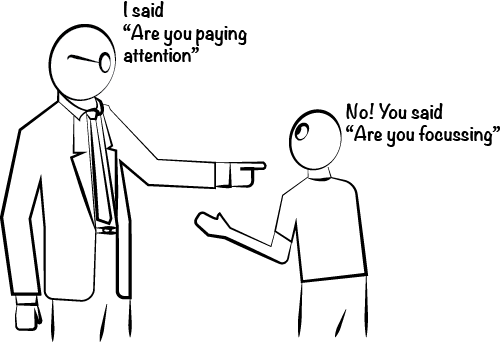

In general NLP tasks structured in a following manner :<br>
* Collecting Dataset
* Preprocessing steps
* Creating Word's embedding [Feature Engineering]
* Model creation
* Model evalutaion
* Deployment

So I am going to discuss about the approaches I have tried to complete this task from basics to advance NLP models. <br>[ Please let me walk through my work ]

I am using Python for this task : <br>

<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" title="Python Logo" width="500" height="100"/>

Basic approaches are using :
* Spacy 
* Gensim
* NLTK

In [ ]:
# Install spacy model 
#!python -m spacy download en_core_web_md

In [ ]:
import spacy 
import pandas as pd
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
nlp_english = English()
nlp = spacy.load('en_core_web_md') 

In [ ]:
# You can replace these two sentences by anything you want ..........
sentence1 = nlp_english("Reports that the NSA eavesdropped on world leaders have severely shaken relations between Europe and the US German Chancellor Angela Merkel said")
sentence2 = nlp_english("Germany and France are to seek talks with the US to settle a row over spying, as espionage claims continue to overshadow an EU summit in Brussels")

tokens1 = [i.text for i in sentence1]
tokens2 = [i.text for i in sentence2]

def stopword_removal(text):
  filtered_sentence =[] 
  for word in text:
      lexeme = nlp_english.vocab[word]
      if lexeme.is_stop == False:
          filtered_sentence.append(nlp(word)) 
  return filtered_sentence

tokens1 = stopword_removal(tokens1)
tokens2 = stopword_removal(tokens2)

In [ ]:
print("Similarity score  : ")
score = pd.DataFrame(columns=["Token1", "Token2", "Score"])
for i,j in zip(tokens1, tokens2):
    score = score.append({"Token1": i[0], "Token2": j[0], "Score": i.similarity(j)}, ignore_index = True)
print(score.head())

Similarity score  : 
         Token1   Token2     Score
0       Reports  Germany  0.028611
1           NSA   France  0.150249
2  eavesdropped     seek  0.006154
3         world    talks  0.324193
4       leaders   settle  0.261939


Similarly you can do this using Gensim, NLTK library as well.<br>
For this approach to work you can use any type of embeddings, well known embeddings are :
* Bag of Words
* TF-IDF
* Word2vec 
* Doc2vec <br>

For more detail you can refer [this blog](https://dev.to/coderasha/compare-documents-similarity-using-python-nlp-4odp).

## Problem with this approach <br>
They are working fine with the unigram model but when we are concerned about context or the meaning of the sentences they fail to capture those. So we move towards some deep learning approaches or papers that help us to create our models to tackle this problem.
<br>

## Approaches I tried (dataset I used [Quora-Question-pair](https://www.kaggle.com/c/quora-question-pairs/data)):
* Siamese-LSTM network [ [Paper](https://www.researchgate.net/publication/307558687_Siamese_Recurrent_Architectures_for_Learning_Sentence_Similarity) ]  <br> <br>
<img src="https://cloud.githubusercontent.com/assets/9861437/20479493/6ea8ad12-b004-11e6-89e4-53d4d354d32e.png" title="Python Logo" width="700" height="300"/>
<br>
* Bert-Layer architecture by keras [Link](https://keras.io/examples/nlp/text_extraction_with_bert/)<br><br>
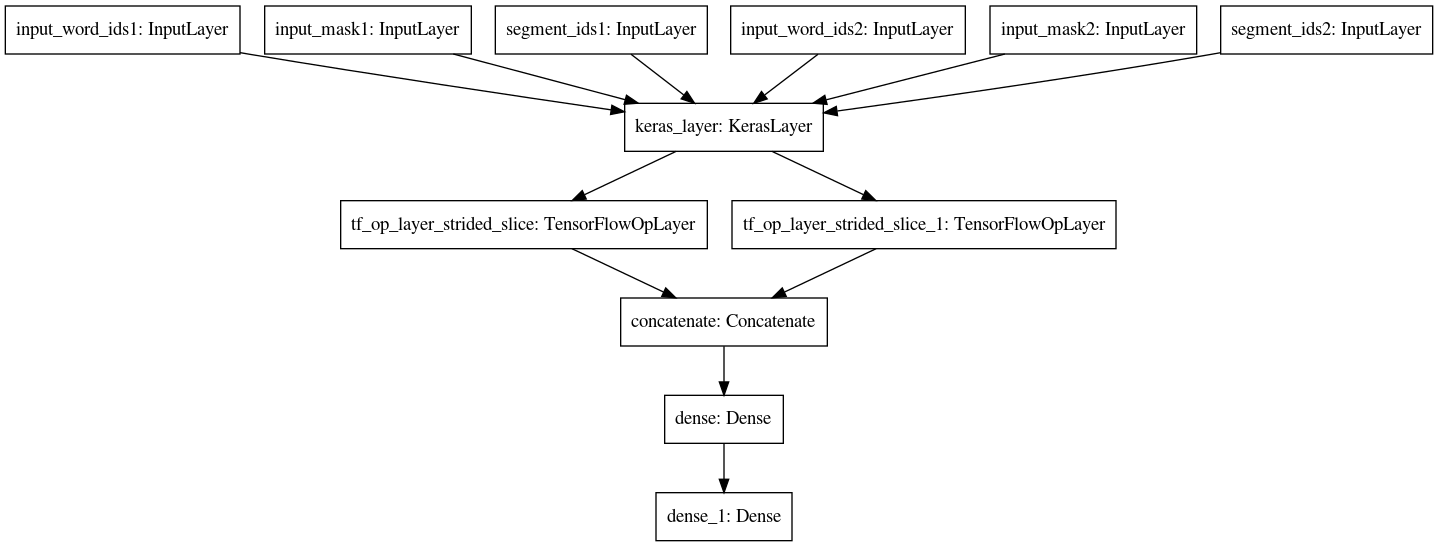

# <strong>I have tried implementing both the architecture :</strong> 
* For Simaese LSTM : <br>
https://github.com/Pawan300/NLP/tree/master/Text%20similarity/Siamese_LSTM
* For BERT model : <br> https://github.com/Pawan300/NLP/tree/master/Text%20similarity/Bert_model

# Problem with these approaches : 

* Siamese LSTM : <br>
  This is an old technique intoduce in 2015. So it worked fine with the small sentences but incapable of handle large sentences due to lack of attention module.

* BERT-layer :<br>
  This module is new but requires lots of resources to train your model and come up with your architecture.

Let me introduce you with the hugging face.<br>
<img src="https://huggingface.co/favicon.ico" title="Python Logo" width="200" height="200"/>

Caution : This is not just an emoji.<img src="https://huggingface.co/favicon.ico" title="Python Logo" width="20" height="20"/>

* Who are they?
  - Hugging Face is a company which develops social AI-run chatbot applications. It was established in 2016 by Clement Delangue and Julien Chaumond. The company is based in Brooklyn, New York, United States.
  - [Website](https://huggingface.co/)

* What they do?
  - They are on a mission [ Not like a mangal yan or URI attack or demobilize ISIS ] to solve NLP problems.
  - Their job is to implement State-of-art models in NLP.

* Goal : <br>
  - <strong>On a mission to solve NLP,
one commit at a time.</strong>

You can find pre-trained models here. https://huggingface.co/models

I have tried many models from hugging face library [ They are for the task Text classsification]:
* bert-base-uncased
* bert-base-cased-finetuned-mrpc
* distilbert-base-uncased-finetuned-sst-2-english
* distilbert-base-uncased
* roberta-large-mnli
* joeddav/xlm-roberta-large-xnli
* ishan/bert-base-uncased-mnli
* textattack/roberta-base-MNLI
* distilbert-base-nli-stsb-mean-tokens [This is working better] <br>
and some other as well.

Model 1 Demo : 

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.3.0
Running on TPU  ['10.112.230.250:8470']


INFO:tensorflow:Initializing the TPU system: grpc://10.112.230.250:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.112.230.250:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
# !pip install tokenizer
# !pip install transformers
# !pip install torch

In [ ]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import tensorflow as tf

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased-finetuned-mrpc")
model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-cased-finetuned-mrpc")

Some weights of the model checkpoint at bert-base-cased-finetuned-mrpc were not used when initializing TFBertForSequenceClassification: ['dropout_183']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased-finetuned-mrpc and are newly initialized: ['dropout_75']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
classes = ["Similar", "Not Similar"]

sequence_0 = "Reports that the NSA eavesdropped on world leaders have \"severely shaken\" relations between Europe and the U.S., German Chancellor Angela Merkel said."
sequence_1 = "Germany and France are to seek talks with the US to settle a row over spying, as espionage claims continue to overshadow an EU summit in Brussels."

demo = tokenizer(sequence_0, sequence_1, return_tensors="tf")
demo_logits = model(demo)[0]
result = tf.nn.softmax(demo_logits, axis=1).numpy()[0]
for i in range(len(classes)):
       print(f"{classes[i]}: {int(round(result[i] * 100))}%")

Similar: 96%
Not Similar: 4%


Model 2 Demo: <br>
This model is working better then other models.

In [ ]:
# !pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

100%|██████████| 245M/245M [00:14<00:00, 17.4MB/s]


In [ ]:
sequence_0 = "Reports that the NSA eavesdropped on world leaders have \"severely shaken\" relations between Europe and the U.S., German Chancellor Angela Merkel said."
sequence_1 = "Germany and France are to seek talks with the US to settle a row over spying, as espionage claims continue to overshadow an EU summit in Brussels."

sequence_0 = embedder.encode(sequence_0, convert_to_tensor=True)
sequence_1 = embedder.encode(sequence_1, convert_to_tensor=True)

util.pytorch_cos_sim(sequence_1, sequence_0)[0]

tensor([0.5318])

In [ ]:
sequence_0 = "Sehwag is played for india as per the BCCI"
sequence_1 = "All nominees for the nobel belongs here."

sequence_0 = embedder.encode(sequence_0, convert_to_tensor=True)
sequence_1 = embedder.encode(sequence_1, convert_to_tensor=True)

util.pytorch_cos_sim(sequence_1, sequence_0)[0]

tensor([0.0123])

In [ ]:
sequence_0 = "Quora is not user friendly so i prefer google because answers are available over there."
sequence_1 = "Why do people ask Quora questions which can be answered easily by Google?"

sequence_0 = embedder.encode(sequence_0, convert_to_tensor=True)
sequence_1 = embedder.encode(sequence_1, convert_to_tensor=True)

util.pytorch_cos_sim(sequence_1, sequence_0)[0]

tensor([0.5521])

# Architecture built on the top of Transformer built by Hugging face


## <stromg> I have tried this model. [here](https://github.com/Pawan300/NLP/tree/master/Text%20similarity/Sentence-pair-classifier)<strong>

##Codes I have used in this projects are available here. Please take a visit. <br>
Github account : https://github.com/Pawan300/NLP/tree/master/Text%20similarity